In [20]:
import os
import sys
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

In [9]:
gdf_est = aqiGDL.gdf_from_db('estaciones_gdl','Estaciones')
gdf_est = ox.project_gdf(gdf_est,to_crs='EPSG:32613')
gdf_est.head(2)

,Name,x,y,geometry
0,10. Colon,-103.400806,20.606105,POINT (666650.899 2279373.835)
1,11. UVM,-103.406642,20.608323,POINT (666040.129 2279613.376)


In [6]:
gdf_air = gpd.read_file('../data/processed/PM10_2018-12-20_23h_hour.geojson')
gdf_air = ox.project_gdf(gdf_air,to_crs='EPSG:32613')
gdf_air.head(2)

,lat,long,conc,geometry
0,20.529149,-103.455437,216.763139,POINT (661037.437 2270800.071)
1,20.539149,-103.455437,213.181621,POINT (661026.967 2271907.044)


In [17]:
gdf_est_simaj = aqiGDL.gdf_from_db('estaciones_simaj','estaciones_simaj')
gdf_est_simaj = ox.project_gdf(gdf_est_simaj,to_crs='EPSG:32613')
gdf_est_simaj.head(2)

,_id,lat,long,id,nombre,codigo,redesid,geometry
0,5cccf5bee2705c19328205ac,20.719674,-103.355435,101,Atemajac,ATM,63,POINT (671252.552 2291993.392)
1,5cccf5bee2705c19328205ad,20.673765,-103.333336,102,Centro,CEN,63,POINT (673606.485 2286934.592)


In [7]:
G = aqiGDL.graph_from_db('Guadalajara')
edges = ox.graph_to_gdfs(G,nodes=False)
edges = ox.project_gdf(edges,to_crs='EPSG:32613')
#G = None
edges.head(2)

,highway,oneway,length,geometry,name,lanes,bridge,access,junction,maxspeed,ref,service,tunnel,width,area,u,v,key
0,residential,False,122.459,"LINESTRING (680298.850 2283144.719, 680312.087...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6347554817,6347554813,0
1,residential,False,144.322,"LINESTRING (680298.850 2283144.719, 680281.509...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6347554817,1643880278,0


(2270800.0712549286, 2294247.307281666)

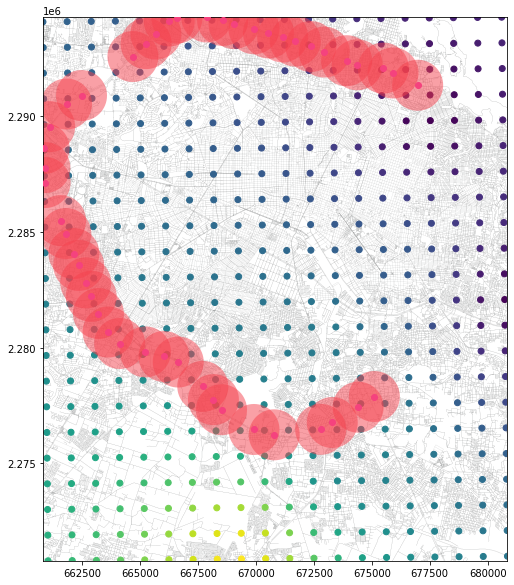

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.1)
gdf_air.plot(ax=ax, column='conc', zorder=1)
gdf_est.plot(ax=ax, zorder=3, color='#f5427e')
gdf_est.buffer(1100).plot(ax=ax, zorder=2, color='#f5424e', alpha=0.5)

minx, miny, maxx, maxy = gdf_air.geometry.total_bounds

ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

In [11]:
buffer_dist = 1000
buffer = gpd.GeoDataFrame({'geometry':gdf_est.buffer(buffer_dist),'Name':gdf_est['Name']},geometry='geometry',crs=gdf_est.crs)
buffer['mean-conc'] = gpd.sjoin(buffer,gdf_air).groupby(['Name']).mean().reset_index()['conc']

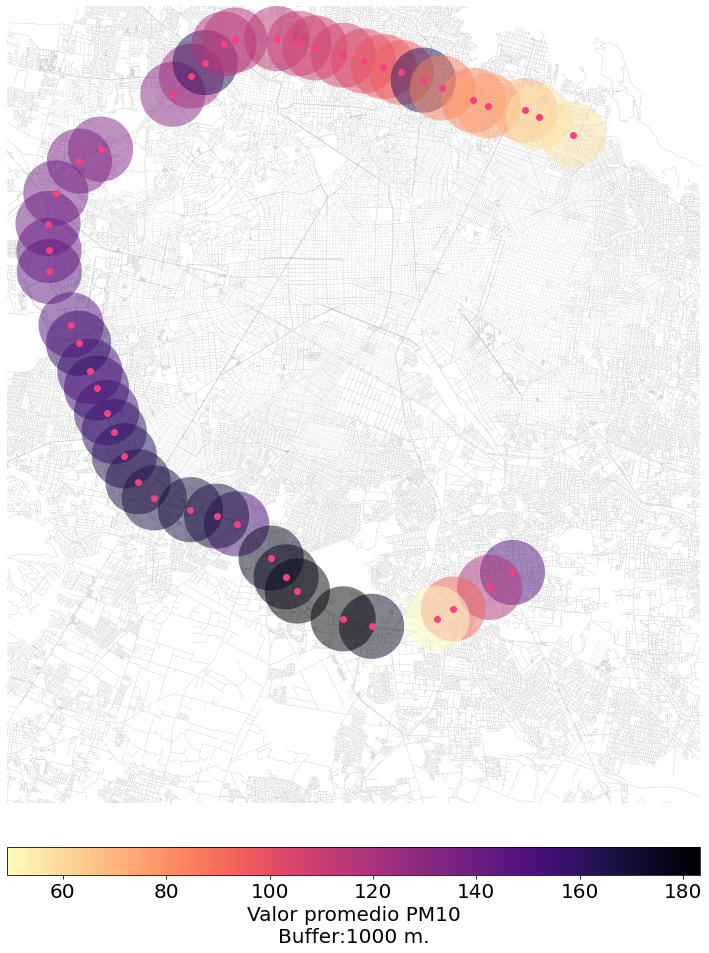

In [12]:
fig, axes = plt.subplots(2,1,figsize=(10,14), gridspec_kw={"height_ratios":[0.96, 0.03]})
ax = axes[0]
edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.1)
#gdf_air.plot(ax=ax, column='conc', zorder=1)
gdf_est.plot(ax=ax, zorder=3, color='#f5427e')
buffer.plot(ax=ax, zorder=2,  column='mean-conc', markersize=buffer_dist, alpha=0.5, cax=axes[1],legend=True, 
            cmap='magma_r', legend_kwds={'label': "Valor promedio en zona de captura",'orientation': "horizontal"})

minx, miny, maxx, maxy = gdf_air.geometry.total_bounds
ax.set_xlim(minx-1200,maxx)
ax.set_ylim(miny,maxy+1000)
ax.axis('off')
axes[1].set_xlabel(f'Valor promedio PM10\nBuffer:{buffer_dist} m.',fontsize=20)
axes[1].tick_params(labelsize=20)
fig.tight_layout()
for f in ['pdf','png']:
    plt.savefig(f'../output/figures/GDL-estaciones-pm10-test.{f}',dpi=300,transparent=False, bbox_inches = 'tight')

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


"for f in ['pdf','png']:\n    plt.savefig(f'../output/figures/GDL-estaciones-pm10-test.{f}',dpi=300,transparent=False, bbox_inches = 'tight')"

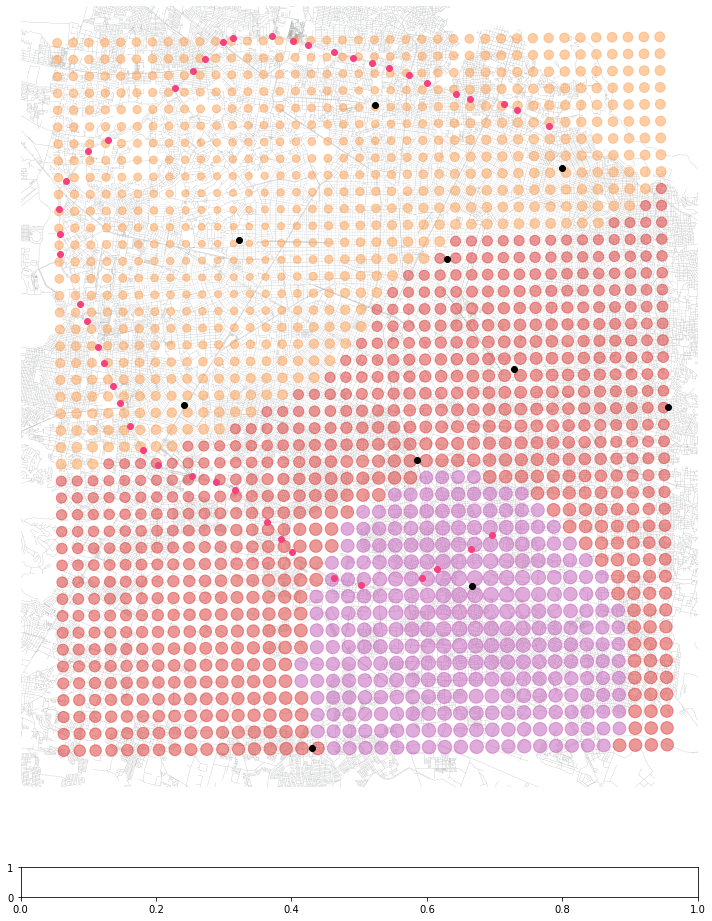

In [30]:
#for d in range (1,24):
d = 1

interpolation = 'pm10_20190101_{:02d}h_hour'.format(d)

interpolation_gdf = aqiGDL.gdf_from_db(
        name=interpolation, schema='interpolation')

interpolation_gdf = ox.project_gdf(interpolation_gdf,to_crs='EPSG:32613')

fig, axes = plt.subplots(2,1,figsize=(10,14), gridspec_kw={"height_ratios":[0.96, 0.03]})
ax = axes[0]
#ax = plt.gca()

edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.1)

'''interpolation_gdf.plot(ax=ax, color=interpolation_gdf.Colour, 
                       ms = 10.0, column='conc', zorder=1)'''




gdf_est.plot(ax=ax, zorder=3, color='#f5427e')


gdf_est_simaj.plot(ax=ax, zorder=3, color='#000000')


interpolation_gdf['Size'] = interpolation_gdf['Size']*20

'''interpolation_gdf.plot(ax=ax, zorder=2,  column='conc', markersize='Size', alpha=0.5, cax=axes[1],legend=True, 
            color=interpolation_gdf.Colour, legend_kwds={'label': "Valor promedio en zona de captura",'orientation': "horizontal"})
'''
#sin leyenda
interpolation_gdf.plot(ax=ax, zorder=2,  column='conc', markersize='Size', alpha=0.5,
            color=interpolation_gdf.Colour,)




'''gdf_est.plot(ax=ax, zorder=3, color='#f5427e')
buffer.plot(ax=ax, zorder=2,  column='mean-conc', markersize=buffer_dist, alpha=0.5, cax=axes[1],legend=True, 
            cmap='magma_r', legend_kwds={'label': "Valor promedio en zona de captura",'orientation': "horizontal"})'''




cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])


bounds = [1, 2, 4, 7, 8]


norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                 boundaries=bounds, orientation='horizontal', label='Probability')




minx, miny, maxx, maxy = interpolation_gdf.geometry.total_bounds
ax.set_xlim(minx-1200,maxx+1000)
ax.set_ylim(miny-1200,maxy+1000)
ax.axis('off')
#sin leyenda axes[1].set_xlabel(f'Valor promedio PM10\nBuffer:{buffer_dist} m.',fontsize=20)
#sin leyenda axes[1].tick_params(labelsize=20)
fig.tight_layout()
'''for f in ['pdf','png']:
    plt.savefig(f'../output/figures/GDL-estaciones-pm10-test.{f}',dpi=300,transparent=False, bbox_inches = 'tight')'''